In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import task_complexity
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

target_transform_cifar10 = transforms.Compose([
    lambda x: torch.tensor(x),
    lambda x: F.one_hot(x, num_classes = 10)
    ])

batch_size = 128

trainset_cifar10 = CIFAR10(root = '../example_data/', train = True, transform = transform, target_transform = target_transform_cifar10)
trainloader_cifar10 = torch.utils.data.DataLoader(trainset_cifar10, batch_size = batch_size, shuffle = True, num_workers = 2)

In [3]:
criterion = nn.CrossEntropyLoss(reduction = "none")

In [4]:
class Net_CIFAR10(nn.Module):
        def __init__(self, hidden_nodes = 1024):
            super().__init__()
            self.fc1 = nn.Linear(32 * 32 * 3, hidden_nodes)
            self.fc2 = nn.Linear(hidden_nodes, 10)

        def forward(self, x):
            x = torch.flatten(x, 1)
            x = F.relu(self.fc1(x))
            x = F.softmax(self.fc2(x), dim = 0)
            return x

In [5]:
class ClearCache:
    def __enter__(self):
        torch.cuda.empty_cache()

    def __exit__(self, exc_type, exc_val, exc_tb):
        torch.cuda.empty_cache() 

In [6]:
hidden_node_amounts = [int(num) for num in np.linspace(1, 100, 100)]
mi_scores = []
for hidden_nodes in hidden_node_amounts:
    with ClearCache():
        mi_score = task_complexity.compute_complexity(Net_CIFAR10, 10, trainloader_cifar10, criterion, n_bins = 100, network_architecture_parameters = [hidden_nodes])
    print(f"Hidden Nodes: {hidden_nodes}, Mi Score: {mi_score}")
    mi_scores.append(mi_score)

Hidden Nodes: 1, Mi Score: 0.15666392526732764
Hidden Nodes: 2, Mi Score: 0.05006834944861405
Hidden Nodes: 3, Mi Score: 0.0369865348710805
Hidden Nodes: 4, Mi Score: 0.030455812133684645
Hidden Nodes: 5, Mi Score: 0.02897924052159384
Hidden Nodes: 6, Mi Score: 0.017586833856396034
Hidden Nodes: 7, Mi Score: 0.015120574827057087
Hidden Nodes: 8, Mi Score: 0.02431657786320951
Hidden Nodes: 9, Mi Score: 0.014331282562214831
Hidden Nodes: 10, Mi Score: 0.008184636615522045
Hidden Nodes: 11, Mi Score: 0.013626801181191528
Hidden Nodes: 12, Mi Score: 0.006736767948083866
Hidden Nodes: 13, Mi Score: 0.016885502267691255
Hidden Nodes: 14, Mi Score: 0.014550899784072868
Hidden Nodes: 15, Mi Score: 0.014364870497536764
Hidden Nodes: 16, Mi Score: 0.013387320164045313
Hidden Nodes: 17, Mi Score: 0.011687347974423723
Hidden Nodes: 18, Mi Score: 0.008838601406947255
Hidden Nodes: 19, Mi Score: 0.009522137627068439
Hidden Nodes: 20, Mi Score: 0.0064870143464133
Hidden Nodes: 21, Mi Score: 0.0084730

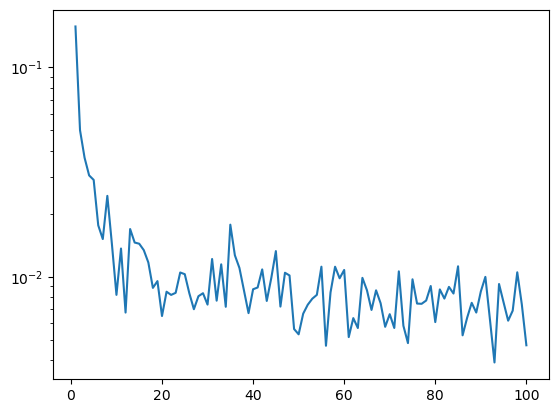

In [7]:
plt.plot(hidden_node_amounts, mi_scores)
plt.yscale("log")